In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression
from cost import compute_loss


### Load train and test data

In [14]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [15]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [16]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 1
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 1

In [17]:
# get train and test data
train_index = jet_train_samples[1]
x, y = X[train_index], Y[train_index]

### Best degree

In [ ]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 71.05686234052064 71.03193025894976
2 75.62889026445201 75.54678634065822
3 76.59909212834003 76.51011038894048
4 77.67289108978989 77.60755184153513
5 78.11565046941091 78.00990405447232
6 78.49865882595688 78.37485814505312
7 79.28358953196465 79.15634994325802
8 80.0169366209292 79.859176725472


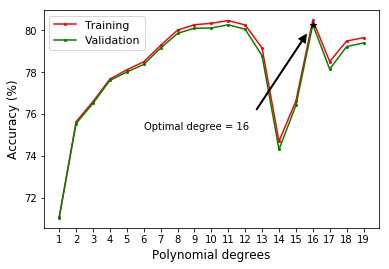

In [19]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-10, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group1.eps")
plt.show()

### Best lambda

In [ ]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [ ]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-2),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group1.eps")
plt.show()